# Overview 
The stock market is very unpredictable, any geopolitical change can impact the share trend of stocks in the share market, recently we have seen how covid-19 has impacted the stock prices, which is why on financial data doing a  reliable trend analysis is very difficult. The most efficient way to solve this kind of issue is with the help of Machine learning and Deep learning. We use Recurrent Neural Networks for time series forecasting of all the banks under Bank Nifty. 


# Time Series Forecasting

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import yfinance as yf

# Data Loading

Entire data

In [3]:
df= yf.Ticker("^NSEBANK").history(period='3y').reset_index()
df_axis= yf.Ticker("AXISBANK.NS").history(period='3y').reset_index()
df_sbi= yf.Ticker("SBIN.NS").history(period='3y').reset_index()
df_rbl= yf.Ticker("RBLBANK.NS").history(period='3y').reset_index()
df_pnb= yf.Ticker("PNB.NS").history(period='3y').reset_index()
df_kot= yf.Ticker("KOTAKBANK.NS").history(period='3y').reset_index()
df_ind= yf.Ticker("INDUSINDBK.NS").history(period='3y').reset_index()
df_idfc= yf.Ticker("IDFCFIRSTB.NS").history(period='3y').reset_index()
df_icic= yf.Ticker("ICICIBANK.NS").history(period='3y').reset_index()
df_band= yf.Ticker("BANDHANBNK.NS").history(period='3y').reset_index()
df_hdfc= yf.Ticker("HDFC.NS").history(period='3y').reset_index()
df_fed= yf.Ticker("FEDERALBNK.NS").history(period='3y').reset_index()
df_au= yf.Ticker("AUBANK.NS").history(period='3y').reset_index()

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-12-02 00:00:00+05:30,32008.300781,32024.099609,31720.599609,31871.449219,0,0,0
1,2019-12-03 00:00:00+05:30,31920.099609,31936.599609,31502.949219,31613.349609,0,0,0
2,2019-12-04 00:00:00+05:30,31549.300781,32017.750000,31444.000000,31979.300781,516800,0,0
3,2019-12-05 00:00:00+05:30,32083.800781,32126.949219,31628.300781,31712.949219,393300,0,0
4,2019-12-06 00:00:00+05:30,31797.150391,31883.699219,31250.650391,31341.550781,485400,0,0


Last 6 months

In [5]:
# df=pd.read_csv('../input/nifty-bank-stock-prices/NSEBANK (1).csv')
# df_axis=pd.read_csv('../input/nifty-bank-stock-prices/AXISBANK.NS.csv')
# df_sbi=pd.read_csv('../input/nifty-bank-stock-prices/SBIN.NS.csv')
# df_rbl=pd.read_csv('../input/nifty-bank-stock-prices/RBLBANK.NS.csv')
# df_pnb=pd.read_csv('../input/nifty-bank-stock-prices/PNB.NS.csv')
# df_kot=pd.read_csv('../input/nifty-bank-stock-prices/KOTAKBANK.NS.csv')
# df_ind=pd.read_csv('../input/nifty-bank-stock-prices/INDUSINDBK.NS.csv')
# df_idfc=pd.read_csv('../input/nifty-bank-stock-prices/IDFCFIRSTB.NS.csv')
# df_icic=pd.read_csv('../input/nifty-bank-stock-prices/ICICIBANK.NS.csv')
# df_band=pd.read_csv('../input/nifty-bank-stock-prices/BANDHANBNK.NS.csv')
# df_hdfc=pd.read_csv('../input/nifty-bank-stock-prices/HDFC.NS.csv')
# df_fed=pd.read_csv('../input/nifty-bank-stock-prices/FEDERALBNK.NS.csv')
# df_au=pd.read_csv('../input/nifty-bank-stock-prices/AUBANK.NS.csv')

# Visualizations

Historical data for Bank Nifty (NSEBANK)

In [6]:
import plotly.express as px
fig = px.line(df, x='Date', y="Open")
fig.show()

In [7]:
print(df_rbl.Date.max())
print(df_rbl.Date.min())

2022-12-02 00:00:00+05:30
2019-12-02 00:00:00+05:30


Historical data for all the banks under Bank Nifty (NSEBANK)

Text(0.5, 1.0, 'au')

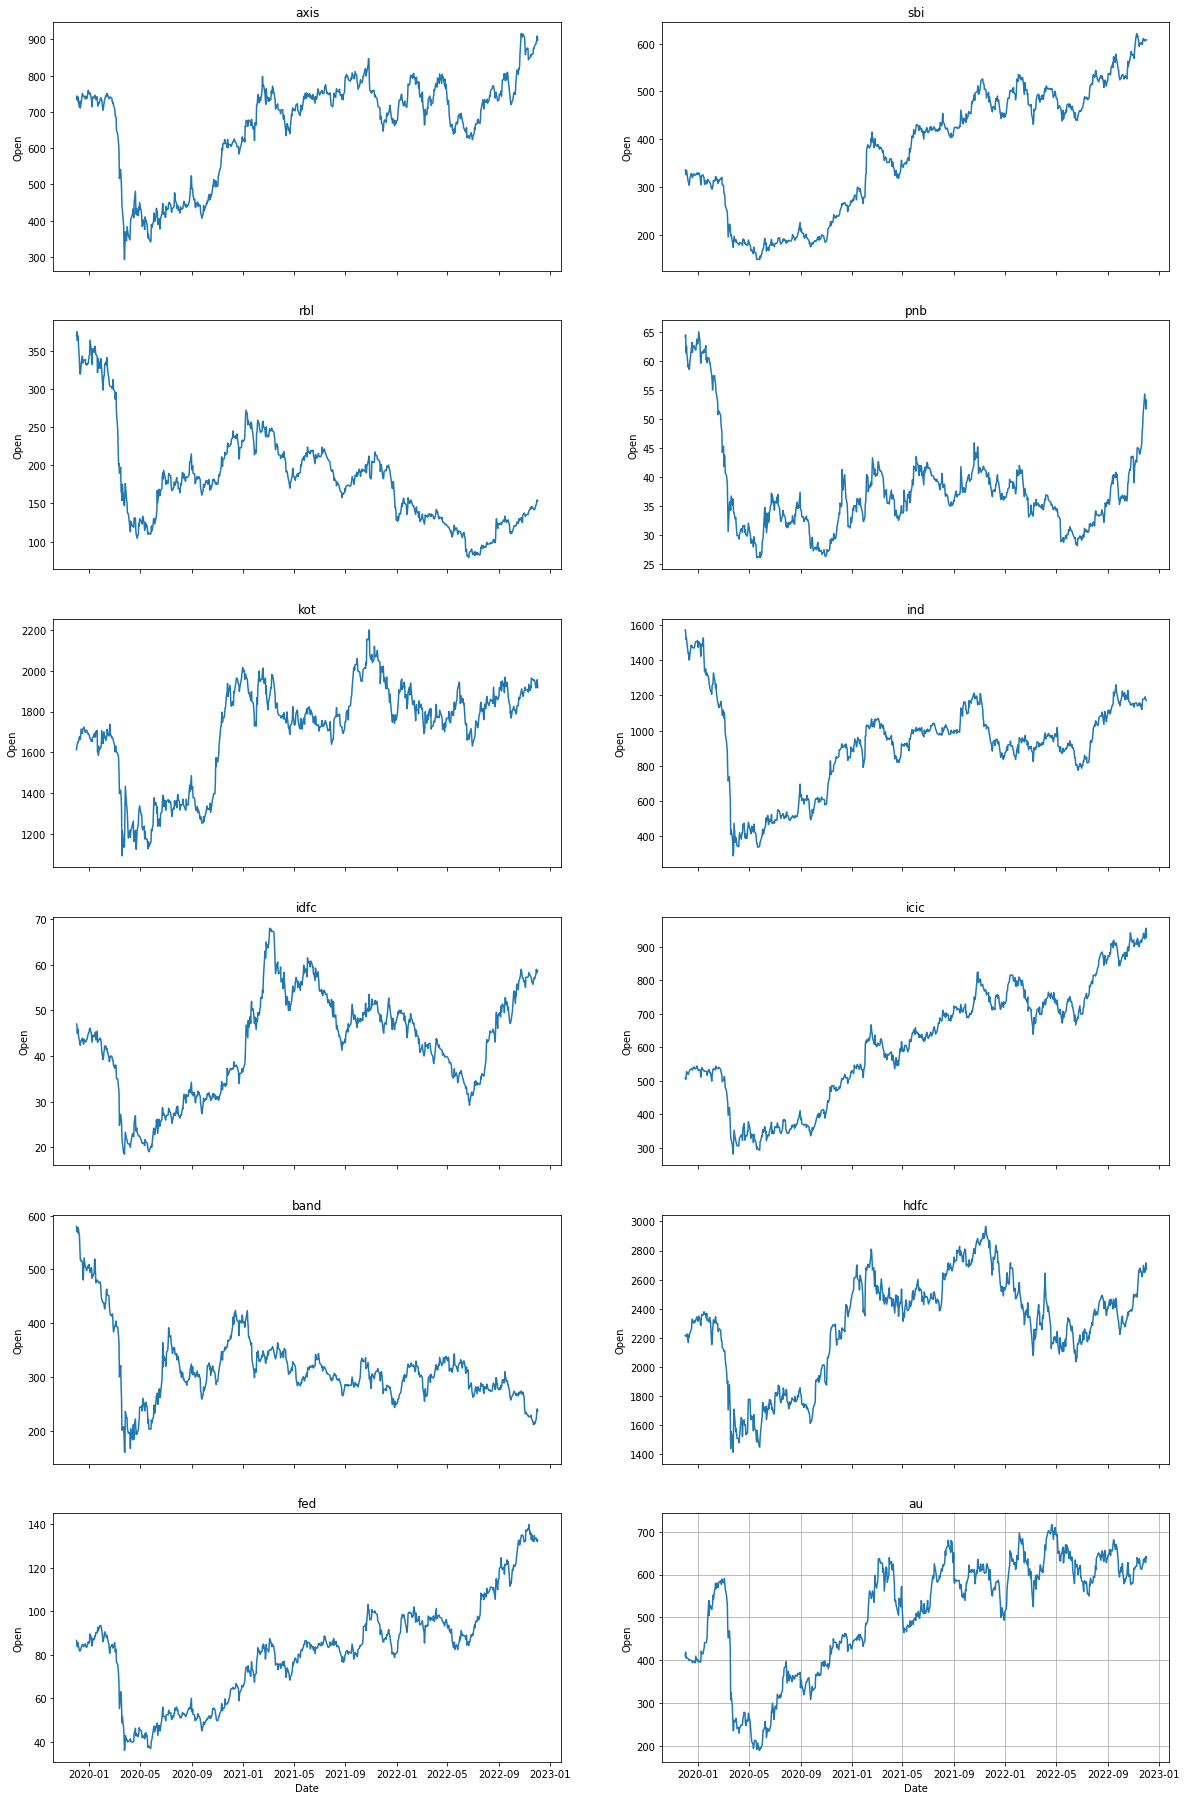

In [8]:
fig, axes = plt.subplots(6, 2, sharex=True, figsize=(20,32))
plt.grid(True)
sns.lineplot(ax=axes[0, 0], data=df_axis, x='Date', y='Open')
axes[0,0].set_title('axis')
sns.lineplot(ax=axes[0, 1], data=df_sbi, x='Date', y='Open')
axes[0,1].set_title('sbi')
sns.lineplot(ax=axes[1, 0], data=df_rbl, x='Date', y='Open')
axes[1,0].set_title('rbl')
sns.lineplot(ax=axes[1, 1], data=df_pnb, x='Date', y='Open')
axes[1,1].set_title('pnb')
sns.lineplot(ax=axes[2, 0], data=df_kot, x='Date', y='Open')
axes[2,0].set_title('kot')
sns.lineplot(ax=axes[2, 1], data=df_ind, x='Date', y='Open')
axes[2,1].set_title('ind')
sns.lineplot(ax=axes[3, 0], data=df_idfc, x='Date', y='Open')
axes[3,0].set_title('idfc')
sns.lineplot(ax=axes[3, 1], data=df_icic, x='Date', y='Open')
axes[3,1].set_title('icic')
sns.lineplot(ax=axes[4, 0], data=df_band, x='Date', y='Open')
axes[4,0].set_title('band')
sns.lineplot(ax=axes[4, 1], data=df_hdfc, x='Date', y='Open')
axes[4,1].set_title('hdfc')
sns.lineplot(ax=axes[5, 0], data=df_fed, x='Date', y='Open')
axes[5,0].set_title('fed')
sns.lineplot(ax=axes[5,1], data=df_au, x='Date', y='Open')
axes[5,1].set_title('au')

# Data Preprocessing

In [9]:
print(df.shape)
date_train=pd.to_datetime(df['Date'])
date_train

(745, 8)


0     2019-12-02 00:00:00+05:30
1     2019-12-03 00:00:00+05:30
2     2019-12-04 00:00:00+05:30
3     2019-12-05 00:00:00+05:30
4     2019-12-06 00:00:00+05:30
                 ...           
740   2022-11-28 00:00:00+05:30
741   2022-11-29 00:00:00+05:30
742   2022-11-30 00:00:00+05:30
743   2022-12-01 00:00:00+05:30
744   2022-12-02 00:00:00+05:30
Name: Date, Length: 745, dtype: datetime64[ns, Asia/Kolkata]

In [10]:
Scale=StandardScaler()
def data_prep(df, lookback, future, Scale):
    date_train=pd.to_datetime(df['Date'])
    df_train=df[['Open','High','Low','Close','Volume','Dividends','Stock Splits']]
    df_train=df_train.astype(float)
    
    df_train_scaled=Scale.fit_transform(df_train)

    X, y =[],[]
    for i in range(lookback, len(df_train_scaled)-future+1):
        X.append(df_train_scaled[i-lookback:i, 0:df_train.shape[1]])
        y.append(df_train_scaled[i+future-1:i+future, 0])
        
    return np.array(X), np.array(y), df_train, date_train

Lstm_x, Lstm_y, df_train, date_train = data_prep(df, 30, 1, Scale)

# LSTM

LSTMs are very powerful in sequence prediction problems because they’re able to store past information. This is important in our case because the previous price of a stock is crucial in predicting its future price.

Long-Short-Term Memory Recurrent Neural Network belongs to the family of deep learning algorithms. It is a recurrent network because of the feedback connections in its architecture. It has an advantage over traditional neural networks due to its capability to process the entire sequence of data. Its architecture comprises the cell, input gate, output gate and forget gate.

The input gate: The input gate adds information to the cell state,
The forget gate: It removes the information that is no longer required by the model,
The output gate: Output Gate at LSTM selects the information to be shown as output.

While Implementing any LSTM, we should always reshape our X train in 3-D, add 1 the reason behind is the time step and the 1 is given to the LSTM.

In [11]:
def Lstm_fallback(X,y):
    model = Sequential()
    
    model.add(LSTM(64, activation='relu',input_shape=(X.shape[1], X.shape[2]),  return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y.shape[1], activation='relu'))

    opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)  
    model.compile(
            loss='mse',
            optimizer=opt,
        )
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y, epochs=100, verbose=1, callbacks=[es], validation_split=0.1, batch_size=16)
    return model



In [12]:
def Lstm_model1(X, y):
    regressor = Sequential()

    regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50, return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))

    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    regressor.fit(X, y, epochs = 100, validation_split=0.1, batch_size = 64, verbose=1, callbacks=[es])
    return regressor

In [13]:
def Lstm_model2(X,y):
    model=Sequential()
    
    model.add(LSTM(20,return_sequences=True,input_shape=(X.shape[1], X.shape[2])))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    #model.add(LSTM(15,return_sequences=True))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(LSTM(15))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1))
    
    adam = optimizers.Adam(0.001)
    model.compile(loss='mean_squared_error',optimizer=adam)
    
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    model.fit(X, y,validation_split=0.2,epochs=100,batch_size=64,verbose=1, callbacks=[es])
    return model

# Prediction

In [14]:
def predict_open(model,date_train,Lstm_x,df_train, future, Scale):
    forecasting_dates=pd.date_range(list(date_train)[-1], periods=future, freq='1d').tolist()
    predicted=model.predict(Lstm_x[-future:])
    predicted1=np.repeat(predicted, df_train.shape[1], axis=-1)
    predicted_descaled=Scale.inverse_transform(predicted1)[:,0]
    return predicted_descaled,forecasting_dates

def output_prep(forecasting_dates,predicted_descaled):
    dates=[]
    for i in forecasting_dates:
        dates.append(i.date())
    df_final=pd.DataFrame(columns=['Date','Open'])
    df_final['Date']=pd.to_datetime(dates)
    df_final['Open']=predicted_descaled
    return df_final

In [15]:
def results(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model1(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()

In [16]:
def results1(df, lookback, future, Scale, x):
    Lstm_x, Lstm_y, df_train, date_train = data_prep(df, lookback, future, Scale)
    model=Lstm_model2(Lstm_x,Lstm_y)
    loss=pd.DataFrame(model.history.history)
    loss.plot()
    future=30
    predicted_descaled,forecasting_dates=predict_open(model,date_train,Lstm_x,df_train,future, Scale)
    results=output_prep(forecasting_dates,predicted_descaled)   
    print(results.head())
    plt.show()
    fig = px.area(results, x="Date", y="Open", title=x)
    fig.update_yaxes(range=[results.Open.min()-10, results.Open.max()+10])
    fig.show()


# Result Visualization

Epoch 1/100
11/11 [==============================] - 11s 299ms/step - loss: 0.4271 - val_loss: 0.2281
Epoch 2/100
11/11 [==============================] - 1s 102ms/step - loss: 0.1011 - val_loss: 0.3416
Epoch 3/100
11/11 [==============================] - 1s 100ms/step - loss: 0.0791 - val_loss: 0.1236
Epoch 4/100
11/11 [==============================] - 1s 100ms/step - loss: 0.0697 - val_loss: 0.1987
Epoch 5/100
11/11 [==============================] - 1s 101ms/step - loss: 0.0679 - val_loss: 0.1741
Epoch 6/100
11/11 [==============================] - 1s 100ms/step - loss: 0.0692 - val_loss: 0.1954
Epoch 7/100
11/11 [==============================] - 1s 113ms/step - loss: 0.0582 - val_loss: 0.0940
Epoch 8/100
11/11 [==============================] - 1s 99ms/step - loss: 0.0632 - val_loss: 0.1411
Epoch 9/100
11/11 [==============================] - 1s 110ms/step - loss: 0.0637 - val_loss: 0.2144
Epoch 10/100
11/11 [==============================] - 1s 110ms/step - loss: 0.0571 - val_lo

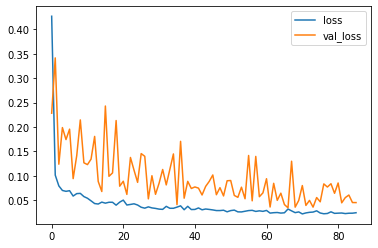

In [17]:
results(df, 30, 1, Scale, 'NSEBANK')

Epoch 1/100
9/9 [==============================] - 5s 143ms/step - loss: 1.1258 - val_loss: 0.7413
Epoch 2/100
9/9 [==============================] - 0s 44ms/step - loss: 0.5628 - val_loss: 0.7430
Epoch 3/100
9/9 [==============================] - 0s 38ms/step - loss: 0.3621 - val_loss: 0.7794
Epoch 4/100
9/9 [==============================] - 0s 37ms/step - loss: 0.2473 - val_loss: 0.8255
Epoch 5/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1743 - val_loss: 0.8445
Epoch 6/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1619 - val_loss: 0.7997
Epoch 7/100
9/9 [==============================] - 0s 36ms/step - loss: 0.1319 - val_loss: 0.7597
Epoch 8/100
9/9 [==============================] - 0s 36ms/step - loss: 0.1131 - val_loss: 0.7313
Epoch 9/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1020 - val_loss: 0.7222
Epoch 10/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1040 - val_loss: 0.7107
Epoch 11/100
9/9 [

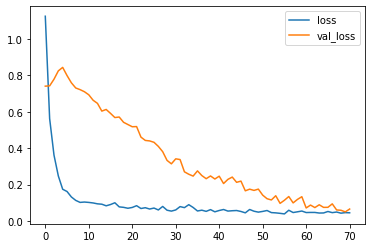

In [18]:
results1(df, 30, 1, Scale, 'NSEBANK')

Epoch 1/100
9/9 [==============================] - 5s 155ms/step - loss: 0.5511 - val_loss: 0.5840
Epoch 2/100
9/9 [==============================] - 0s 46ms/step - loss: 0.2580 - val_loss: 0.7045
Epoch 3/100
9/9 [==============================] - 0s 37ms/step - loss: 0.2214 - val_loss: 0.7164
Epoch 4/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2123 - val_loss: 0.7197
Epoch 5/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1685 - val_loss: 0.7519
Epoch 6/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1629 - val_loss: 0.7410
Epoch 7/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1282 - val_loss: 0.7110
Epoch 8/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1368 - val_loss: 0.7094
Epoch 9/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1148 - val_loss: 0.6932
Epoch 10/100
9/9 [==============================] - 0s 36ms/step - loss: 0.1269 - val_loss: 0.6654
Epoch 11/100
9/9 [

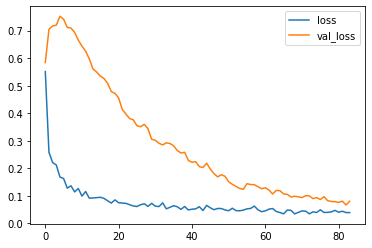

Epoch 1/100
9/9 [==============================] - 5s 141ms/step - loss: 2.3243 - val_loss: 1.6551
Epoch 2/100
9/9 [==============================] - 0s 46ms/step - loss: 0.9865 - val_loss: 1.5525
Epoch 3/100
9/9 [==============================] - 0s 37ms/step - loss: 0.5240 - val_loss: 1.3847
Epoch 4/100
9/9 [==============================] - 0s 39ms/step - loss: 0.3711 - val_loss: 1.2185
Epoch 5/100
9/9 [==============================] - 0s 39ms/step - loss: 0.2827 - val_loss: 1.1080
Epoch 6/100
9/9 [==============================] - 0s 38ms/step - loss: 0.3120 - val_loss: 1.0509
Epoch 7/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2807 - val_loss: 1.0137
Epoch 8/100
9/9 [==============================] - 0s 39ms/step - loss: 0.2635 - val_loss: 0.9965
Epoch 9/100
9/9 [==============================] - 0s 39ms/step - loss: 0.2398 - val_loss: 0.9899
Epoch 10/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1843 - val_loss: 0.9845
Epoch 11/100
9/9 [

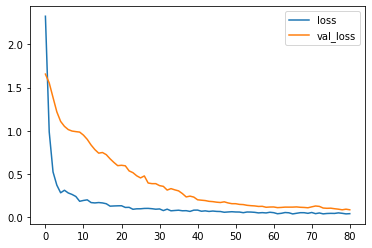

Epoch 1/100
9/9 [==============================] - 4s 137ms/step - loss: 0.9619 - val_loss: 1.0500
Epoch 2/100
9/9 [==============================] - 0s 48ms/step - loss: 0.3848 - val_loss: 1.0797
Epoch 3/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2653 - val_loss: 1.1177
Epoch 4/100
9/9 [==============================] - 0s 37ms/step - loss: 0.2333 - val_loss: 1.1200
Epoch 5/100
9/9 [==============================] - 0s 40ms/step - loss: 0.2172 - val_loss: 1.1051
Epoch 6/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1698 - val_loss: 1.0881
Epoch 7/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1704 - val_loss: 1.0680
Epoch 8/100
9/9 [==============================] - 0s 37ms/step - loss: 0.1691 - val_loss: 1.0209
Epoch 9/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1556 - val_loss: 0.9840
Epoch 10/100
9/9 [==============================] - 0s 40ms/step - loss: 0.1476 - val_loss: 0.9618
Epoch 11/100
9/9 [

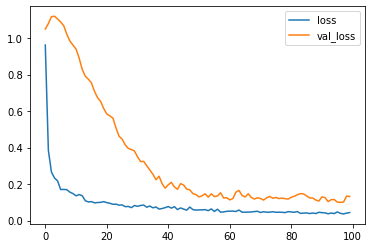

Epoch 1/100
9/9 [==============================] - 5s 136ms/step - loss: 1.5632 - val_loss: 0.5974
Epoch 2/100
9/9 [==============================] - 0s 50ms/step - loss: 0.8307 - val_loss: 0.5772
Epoch 3/100
9/9 [==============================] - 0s 40ms/step - loss: 0.5382 - val_loss: 0.5514
Epoch 4/100
9/9 [==============================] - 0s 39ms/step - loss: 0.3500 - val_loss: 0.5239
Epoch 5/100
9/9 [==============================] - 0s 39ms/step - loss: 0.3148 - val_loss: 0.5112
Epoch 6/100
9/9 [==============================] - 0s 39ms/step - loss: 0.2126 - val_loss: 0.5021
Epoch 7/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1870 - val_loss: 0.4909
Epoch 8/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1621 - val_loss: 0.4885
Epoch 9/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1461 - val_loss: 0.4876
Epoch 10/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1406 - val_loss: 0.4869
Epoch 11/100
9/9 [

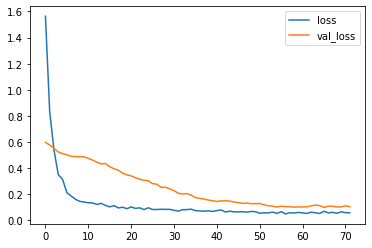

Epoch 1/100
9/9 [==============================] - 7s 323ms/step - loss: 3.8113 - val_loss: 0.4384
Epoch 2/100
9/9 [==============================] - 0s 40ms/step - loss: 1.1960 - val_loss: 0.3950
Epoch 3/100
9/9 [==============================] - 0s 51ms/step - loss: 0.4446 - val_loss: 0.3763
Epoch 4/100
9/9 [==============================] - 0s 54ms/step - loss: 0.3892 - val_loss: 0.3818
Epoch 5/100
9/9 [==============================] - 0s 41ms/step - loss: 0.3259 - val_loss: 0.3975
Epoch 6/100
9/9 [==============================] - 0s 39ms/step - loss: 0.2696 - val_loss: 0.4058
Epoch 7/100
9/9 [==============================] - 0s 44ms/step - loss: 0.2342 - val_loss: 0.4018
Epoch 8/100
9/9 [==============================] - 0s 44ms/step - loss: 0.2488 - val_loss: 0.3916
Epoch 9/100
9/9 [==============================] - 0s 43ms/step - loss: 0.2362 - val_loss: 0.3808
Epoch 10/100
9/9 [==============================] - 0s 45ms/step - loss: 0.2274 - val_loss: 0.3673
Epoch 11/100
9/9 [

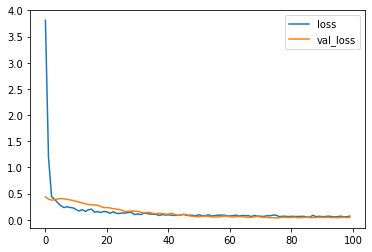

Epoch 1/100
9/9 [==============================] - 6s 139ms/step - loss: 1.8264 - val_loss: 0.5816
Epoch 2/100
9/9 [==============================] - 0s 51ms/step - loss: 0.5573 - val_loss: 0.4546
Epoch 3/100
9/9 [==============================] - 0s 41ms/step - loss: 0.3233 - val_loss: 0.4035
Epoch 4/100
9/9 [==============================] - 0s 40ms/step - loss: 0.2832 - val_loss: 0.4000
Epoch 5/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2686 - val_loss: 0.4050
Epoch 6/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2200 - val_loss: 0.4041
Epoch 7/100
9/9 [==============================] - 0s 40ms/step - loss: 0.1983 - val_loss: 0.3934
Epoch 8/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2079 - val_loss: 0.3885
Epoch 9/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1784 - val_loss: 0.3849
Epoch 10/100
9/9 [==============================] - 0s 44ms/step - loss: 0.1654 - val_loss: 0.3672
Epoch 11/100
9/9 [

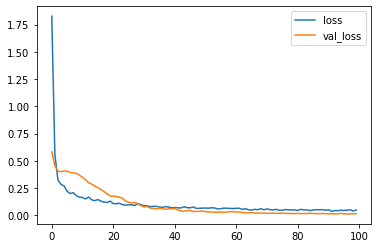

Epoch 1/100
9/9 [==============================] - 5s 141ms/step - loss: 1.7074 - val_loss: 0.6285
Epoch 2/100
9/9 [==============================] - 0s 46ms/step - loss: 0.5475 - val_loss: 0.5177
Epoch 3/100
9/9 [==============================] - 1s 61ms/step - loss: 0.3146 - val_loss: 0.4799
Epoch 4/100
9/9 [==============================] - 0s 43ms/step - loss: 0.2621 - val_loss: 0.4731
Epoch 5/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2541 - val_loss: 0.4761
Epoch 6/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2105 - val_loss: 0.4781
Epoch 7/100
9/9 [==============================] - 0s 39ms/step - loss: 0.1988 - val_loss: 0.4653
Epoch 8/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1549 - val_loss: 0.4590
Epoch 9/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1485 - val_loss: 0.4482
Epoch 10/100
9/9 [==============================] - 0s 40ms/step - loss: 0.1423 - val_loss: 0.4261
Epoch 11/100
9/9 [

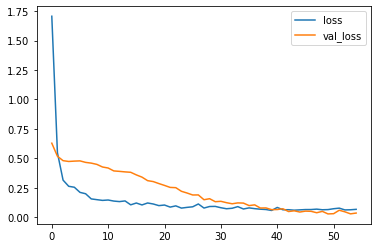

Epoch 1/100
9/9 [==============================] - 5s 162ms/step - loss: 2.0342 - val_loss: 1.7041
Epoch 2/100
9/9 [==============================] - 0s 37ms/step - loss: 0.9768 - val_loss: 1.7633
Epoch 3/100
9/9 [==============================] - 0s 35ms/step - loss: 0.5409 - val_loss: 1.8473
Epoch 4/100
9/9 [==============================] - 0s 38ms/step - loss: 0.3253 - val_loss: 1.7817
Epoch 5/100
9/9 [==============================] - 0s 33ms/step - loss: 0.2080 - val_loss: 1.7572
Epoch 6/100
9/9 [==============================] - 0s 35ms/step - loss: 0.1670 - val_loss: 1.8099
Epoch 7/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1782 - val_loss: 1.8391
Epoch 8/100
9/9 [==============================] - 0s 38ms/step - loss: 0.1408 - val_loss: 1.8255
Epoch 9/100
9/9 [==============================] - 0s 42ms/step - loss: 0.1397 - val_loss: 1.7783
Epoch 10/100
9/9 [==============================] - 1s 83ms/step - loss: 0.1315 - val_loss: 1.7372
Epoch 11/100
9/9 [

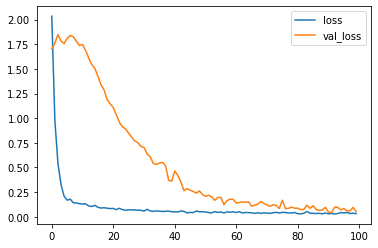

Epoch 1/100
9/9 [==============================] - 6s 157ms/step - loss: 1.1912 - val_loss: 0.4946
Epoch 2/100
9/9 [==============================] - 0s 40ms/step - loss: 0.6285 - val_loss: 0.3926
Epoch 3/100
9/9 [==============================] - 0s 50ms/step - loss: 0.4192 - val_loss: 0.3669
Epoch 4/100
9/9 [==============================] - 0s 39ms/step - loss: 0.3647 - val_loss: 0.3648
Epoch 5/100
9/9 [==============================] - 0s 43ms/step - loss: 0.2816 - val_loss: 0.3670
Epoch 6/100
9/9 [==============================] - 0s 45ms/step - loss: 0.2573 - val_loss: 0.3596
Epoch 7/100
9/9 [==============================] - 0s 37ms/step - loss: 0.2123 - val_loss: 0.3574
Epoch 8/100
9/9 [==============================] - 0s 35ms/step - loss: 0.2095 - val_loss: 0.3549
Epoch 9/100
9/9 [==============================] - 0s 39ms/step - loss: 0.2084 - val_loss: 0.3452
Epoch 10/100
9/9 [==============================] - 0s 41ms/step - loss: 0.1760 - val_loss: 0.3220
Epoch 11/100
9/9 [

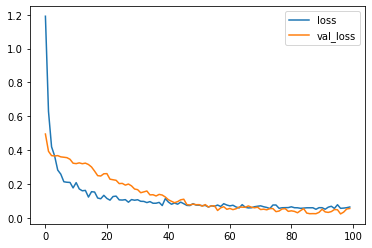

Epoch 1/100
9/9 [==============================] - 5s 178ms/step - loss: 2.8093 - val_loss: 0.1971
Epoch 2/100
9/9 [==============================] - 0s 47ms/step - loss: 0.9362 - val_loss: 0.2101
Epoch 3/100
9/9 [==============================] - 0s 36ms/step - loss: 0.5018 - val_loss: 0.2142
Epoch 4/100
9/9 [==============================] - 0s 46ms/step - loss: 0.3618 - val_loss: 0.2151
Epoch 5/100
9/9 [==============================] - 0s 40ms/step - loss: 0.2721 - val_loss: 0.2144
Epoch 6/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2486 - val_loss: 0.2137
Epoch 7/100
9/9 [==============================] - 0s 37ms/step - loss: 0.2248 - val_loss: 0.2118
Epoch 8/100
9/9 [==============================] - 0s 38ms/step - loss: 0.2027 - val_loss: 0.2050
Epoch 9/100
9/9 [==============================] - 0s 36ms/step - loss: 0.1845 - val_loss: 0.1983
Epoch 10/100
9/9 [==============================] - 0s 36ms/step - loss: 0.1945 - val_loss: 0.1889
Epoch 11/100
9/9 [

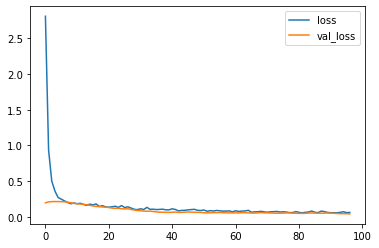

Epoch 1/100
9/9 [==============================] - 11s 339ms/step - loss: 0.8545 - val_loss: 2.0942
Epoch 2/100
9/9 [==============================] - 1s 64ms/step - loss: 0.2790 - val_loss: 1.8397
Epoch 3/100
9/9 [==============================] - 1s 62ms/step - loss: 0.2562 - val_loss: 1.7798
Epoch 4/100
9/9 [==============================] - 1s 69ms/step - loss: 0.1844 - val_loss: 1.7666
Epoch 5/100
9/9 [==============================] - 1s 76ms/step - loss: 0.1710 - val_loss: 1.8022
Epoch 6/100
9/9 [==============================] - 1s 65ms/step - loss: 0.1528 - val_loss: 1.7833
Epoch 7/100
9/9 [==============================] - 1s 60ms/step - loss: 0.1556 - val_loss: 1.8037
Epoch 8/100
9/9 [==============================] - 1s 58ms/step - loss: 0.1211 - val_loss: 1.8117
Epoch 9/100
9/9 [==============================] - 1s 61ms/step - loss: 0.1353 - val_loss: 1.7795
Epoch 10/100
9/9 [==============================] - 1s 64ms/step - loss: 0.1031 - val_loss: 1.7601
Epoch 11/100
9/9 

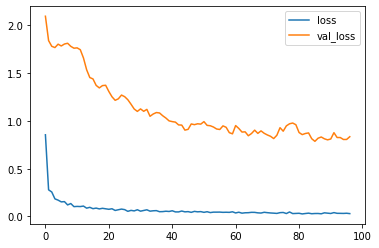

Epoch 1/100
9/9 [==============================] - 12s 285ms/step - loss: 0.8495 - val_loss: 0.6274
Epoch 2/100
9/9 [==============================] - 1s 71ms/step - loss: 0.3744 - val_loss: 0.6374
Epoch 3/100
9/9 [==============================] - 1s 65ms/step - loss: 0.2619 - val_loss: 0.6842
Epoch 4/100
9/9 [==============================] - 1s 66ms/step - loss: 0.1975 - val_loss: 0.6993
Epoch 5/100
9/9 [==============================] - 1s 65ms/step - loss: 0.2138 - val_loss: 0.6966
Epoch 6/100
9/9 [==============================] - 1s 68ms/step - loss: 0.1610 - val_loss: 0.6676
Epoch 7/100
9/9 [==============================] - 1s 63ms/step - loss: 0.1710 - val_loss: 0.6346
Epoch 8/100
9/9 [==============================] - 1s 66ms/step - loss: 0.1346 - val_loss: 0.6355
Epoch 9/100
9/9 [==============================] - 1s 68ms/step - loss: 0.1517 - val_loss: 0.6237
Epoch 10/100
9/9 [==============================] - 1s 68ms/step - loss: 0.1286 - val_loss: 0.5871
Epoch 11/100
9/9 

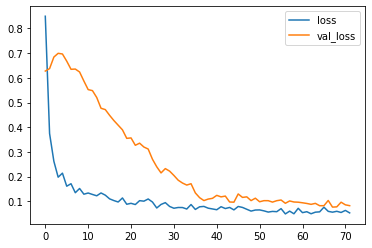

In [19]:
d={'AXIS':df_axis, 'SBI':df_sbi, 'RBL': df_rbl ,'PNB': df_pnb ,'KOTAK': df_kot, 
   'INDUSIND':df_ind, 'IDFC': df_idfc, 'ICIC': df_icic , 'BANDHAN': df_band, 'HDFC': df_hdfc, 'FEDERAL': df_fed,
   'AU FIN':df_au}

for x in d.keys():
    results1(d[x], 30, 1, Scale, x)
    